# AdaBoost Regression with StandardScaler


This Code template is for regression analysis using a simple AdaBoostRegressor based on the Boosting Ensemble Learning technique and feature rescaling technique called StandardScaler

### Required Packages

In [1]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [5]:
file_path =" "

List of features which are  required for model training .

In [7]:
features = []

Target feature for prediction.

In [8]:
target = ' '

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [9]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [10]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [11]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


### Rescaling the Dataset


For rescaling the data StandardScaler function of Sklearn is used.
StandardScaler standardizes features by removing the mean and scaling the data element to unit variance.
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training samples



#### StandardScaler function

sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

Reference URL to StandardScaler API :  

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=features)

In [16]:
X.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1.255628,-0.792495,2.007407,1.125430,0.448762
1,0.157086,-0.616612,1.667503,0.912444,0.401139
2,-0.387791,-0.414015,0.307885,1.486860,0.688183


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

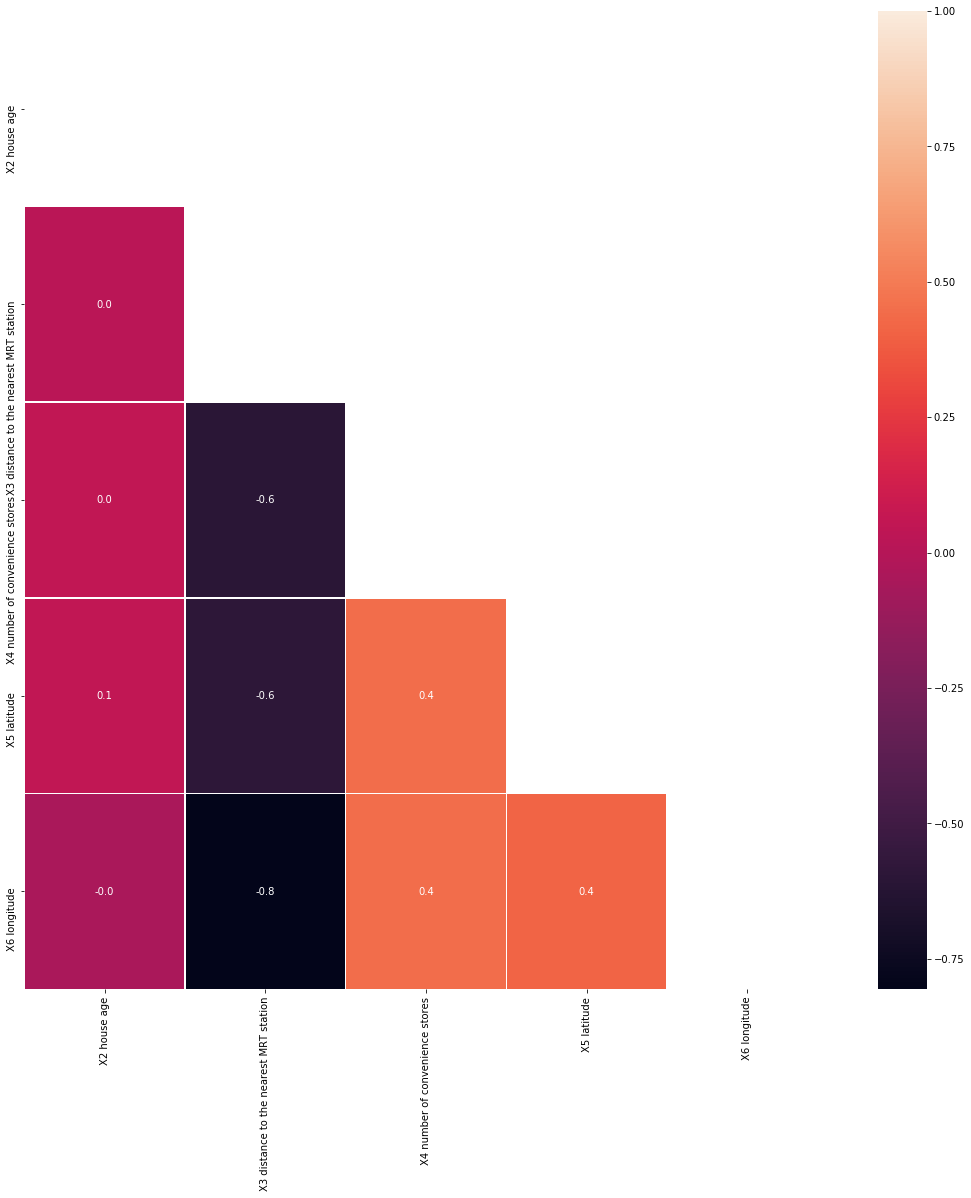

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

### Model

AdaBoost is one of the initial boosting ensemble algorithms to be adapted in solving studies. It helps by combine multiple “weak classifiers” into a single “strong classifier.” The core concept of the algorithm is to fit a sequence of weak learners on repeatedly modified versions of the data. The predictions from all the Weak learners are then combined through a weighted majority vote or sum to produce the outcome/Prediction. The data modifications at each iteration consist of applying weights to each of the training samples. Initially, those weights are all set so that the first iteration only trains a weak learner on the original data. For every successive iteration, the sample weights are individually modified, and the algorithm is reapplied to the reweighted data.    At a given iteration, those training examples which get incorrectly classified by the model at the previous iteration have their weights increased. Whereas the weight gets decreased for data that has been predicted accurately.As iterations continue, data that are difficult to predict or incorrectly classified receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the data that are missed by the previous ones in the sequence

#### Model Tuning Parameters:

    1. base_estimator: object, default=None
> The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeRegressor initialized with max_depth=3.

    2.n_estimators: int, default=50   
> The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

    3. learning_rate: float, default=1. 
> Learning rate shrinks the contribution of each regressor by learning_rate. There is a trade-off between learning_rate and n_estimators.

    4. loss: {‘linear’, ‘square’, ‘exponential’}, default=’linear’
> The loss function to use when updating the weights after each boosting iteration.

#### Note: For better performance of the Adaboost model, the base estimator (Decision Tree Model) can be fine-tuned.


In [19]:
# Build Model here
model = AdaBoostRegressor(random_state=123)
model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)

#### Model Accuracy

We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.

> **score**: The **score** function returns the coefficient of determination <code>R<sup>2</sup></code> of the prediction.

In [20]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 70.16 %



> **r2_score**: The **r2_score** function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.  

> **mae**: The **mean abosolute error** function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.  

> **mse**: The **mean squared error** function squares the error(penalizes the model for large errors) by our model. 

In [21]:
y_pred=model.predict(X_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 70.16 %
Mean Absolute Error 5.72
Mean Squared Error 53.50


#### Feature Importances

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1, 5)

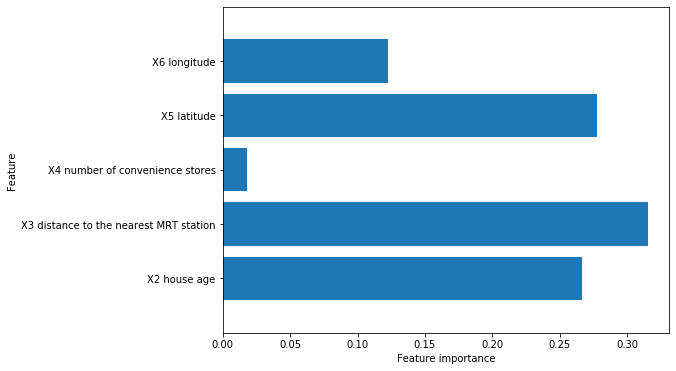

In [22]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Prediction Plot

First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis.
For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

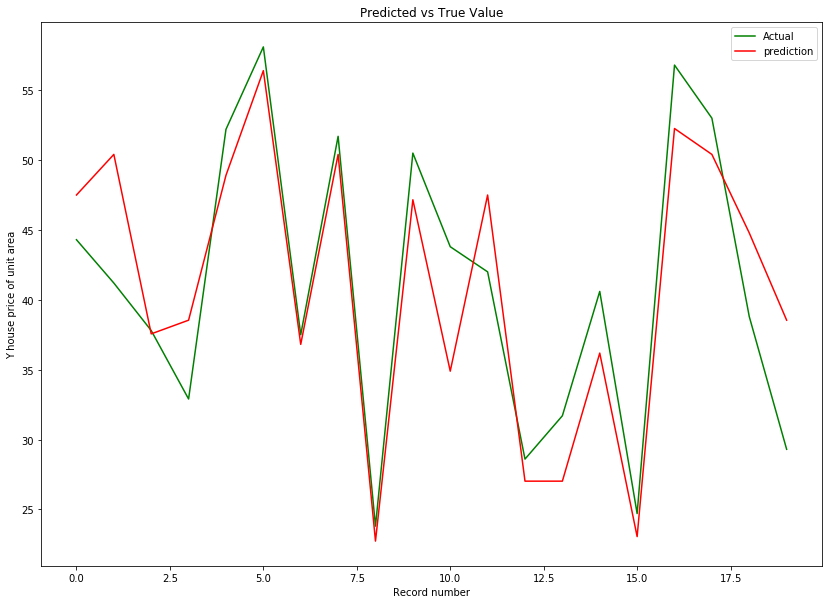

In [23]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator: Surya Kiran , Github: [Profile](https://github.com/surya2365)
